In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

2023-09-23 17:17:06.421060: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-23 17:17:07.325679: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [3]:
train_images.shape 

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

**扩张到四维，None，hight，width，channal**

In [7]:
train_images = np.expand_dims(train_images,-1)
test_images = np.expand_dims(test_images,-1)

In [8]:
train_images.shape

(60000, 28, 28, 1)

**建立模型**

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),
                                 input_shape=train_images.shape[1:],
                                 activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())#默认2x2
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())#全局平均池化
model.add(tf.keras.layers.Dense(10,activation='softmax'))

2023-09-23 17:14:16.188866: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-23 17:14:16.213580: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-23 17:14:16.213779: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 global_average_pooling2d (  (None, 64)                0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 10)                650       
                                                                 
Total params: 38218 (149.29 KB)
Trainable params: 38218 

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),input_shape=train_images.shape[1:],activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPooling2D())#默认2x2
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPooling2D())#默认2x2
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPooling2D())#默认2x2
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GlobalAveragePooling2D())#全局平均池化
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [12]:
history=model.fit(train_images,
                  train_labels,
                  epochs=5,
                 validation_data=(test_images,test_labels))

Epoch 1/5


2023-09-23 17:14:27.267699: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8801
2023-09-23 17:14:28.929949: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-23 17:14:29.052727: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-09-23 17:14:29.136310: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f3d3e2c8320 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-23 17:14:29.136332: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-09-23 17:14:29.199545: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-23 17:

1875/1875 [==============================] - 11s 3ms/step - loss: 0.7734 - acc: 0.7532 - val_loss: 0.5283 - val_acc: 0.8132
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4629 - acc: 0.8388 - val_loss: 0.4480 - val_acc: 0.8449
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4081 - acc: 0.8588 - val_loss: 0.4519 - val_acc: 0.8387
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3736 - acc: 0.8679 - val_loss: 0.3896 - val_acc: 0.8633
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3496 - acc: 0.8774 - val_loss: 0.4319 - val_acc: 0.8485


In [13]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

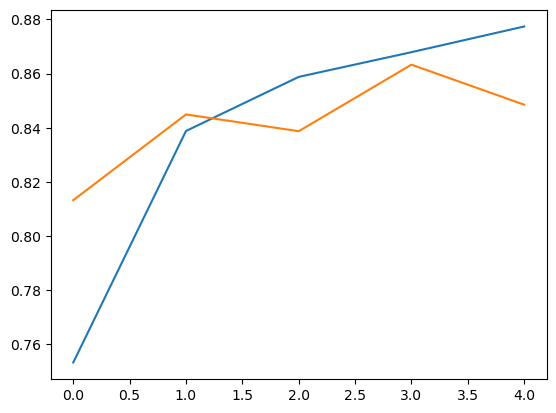

In [15]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')